In [1]:
#encoding=utf-8,
import jieba
import sys, codecs, re, os, csv
from io import open
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import itertools
from DictionaryServices import *
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_rows = 9999999
path = '/Users/onyi/Dropbox/textbooks'

<h4> A Dictionary Function that looks up the word definition using Dictionary App </h4>

In [3]:
#dictionary function
def dictionary(searchword):
    wordrange = (0, len(searchword))
    dictresult = DCSCopyTextDefinition(None, searchword, wordrange)
    if not dictresult:
        errmsg = "'%s' not found in Dictionary." % (searchword)
        return(errmsg)
    else:
        return(dictresult)

####Add words to dictionary

In [4]:
new_words = ['关係','窘','锐意','无奈','势孤力弱','远远','蓄谋已久']
for word in new_words:
    jieba.add_word(word, freq=None, tag=None)
    jieba.suggest_freq(word, True)

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/_w/wb0_lsb14ls2qrdq804s92tr0000gn/T/jieba.cache
DEBUG:jieba:Loading model from cache /var/folders/_w/wb0_lsb14ls2qrdq804s92tr0000gn/T/jieba.cache
Loading model cost 1.041 seconds.
DEBUG:jieba:Loading model cost 1.041 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


In [4]:
book={}
words={}
WordDef={}
NoFile= len([file for file in os.listdir(path) if os.path.isfile(os.path.join(path, file)) 
             and file.endswith(".txt") ])
book2index={}
wordlist = [[] for i in range(NoFile)]


In [5]:

i=0
book_file_name = []
book_length=[]
for file in os.listdir(path):
    if not file.startswith('.'):
        file_path = os.path.join(path, file)
        if os.path.isfile(file_path) and file.endswith(".txt"):
            with open(file_path) as f: 
                book[file] = f.read()
                print(file)
                book[file] = re.sub("[。，；:!：“、〈〉\n\t■◆”《》~ ;﹜﹛()*.,a-zA-Z「」﹔（）〔〕？\d+]", "", book[file])
                book_file_name.append(file)
                words[file]= jieba.cut(book[file], cut_all=True) #segmenting the content  
                book2index[file] = i
                for word in words[file]:
                    if "not found in Dictionary." in dictionary(word):
                        pass
                    else:
                        WordDef[word] = dictionary(word)
                        wordlist[i].append(word)
                temp = len(book[file])
                #print(temp)
                i=i+1
                #count number of words in each book
                book_length.append(temp)

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/_w/wb0_lsb14ls2qrdq804s92tr0000gn/T/jieba.cache
DEBUG:jieba:Dumping model to file cache /var/folders/_w/wb0_lsb14ls2qrdq804s92tr0000gn/T/jieba.cache
Loading model cost 1.479 seconds.
DEBUG:jieba:Loading model cost 1.479 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


hk_文達必修4.txt
hk_文達必修5.txt
hk_文達必修6.txt
hk_現代4下.txt
hk_現代5上.txt
hk_現代5下.txt
ma_old人教版历史书.txt
ma_old人教版历史书下册.txt
ma_人教版高中历史必修一现代中国部分.txt
ma_人教版高中历史必修三现代中国部分.txt
ma_人教版高中历史必修二现代中国部分.txt
ma_人民版高中历史必修一现代中国部分.txt
ma_人民版高中历史必修三现代中国部分.txt
ma_人民版高中历史必修二现代中国部分.txt
ma_岳麓版高中历史必修一现代中国部分.txt
ma_岳麓版高中历史必修三现代中国部分.txt
ma_岳麓版高中历史必修二现代中国部分.txt
search_china.txt
tw_old台湾历史书 - 高中历史第三册.txt
tw_南一第二.txt
tw_康熹.txt


In [6]:
books = pd.DataFrame.from_dict(dict(zip(book_file_name, book_length)), orient = 'index').reset_index()
books.columns = ['book_edition','book length']

In [7]:
from collections import Counter
adjcount_res = [[] for i in range(NoFile)] 
adjcount = [[] for i in range(NoFile)] 
adjratio_res = [[] for i in range(NoFile)]
adjratio = [[] for i in range(NoFile)]
adjlist= [[] for i in range(NoFile)]
adjlist_res = [[] for i in range(NoFile)]
indiv_adj = [[] for i in range(NoFile)]
indiv_adj_res = [[] for i in range(NoFile)]

fucount = [[] for i in range(NoFile)] 
furatio = [[] for i in range(NoFile)]
fulist= [[] for i in range(NoFile)]
indiv_fu = [[] for i in range(NoFile)]

stopwords = ['就','可以', '从','出','三','者','奕','著','可能','太平','鲁','交','分别','奉',
             '為','對','便','张','係','喎','是','等','和','到','对','本','面','动', '相',
             '在','了','为','以','月','年','人','下','於','已','来','于','一','可是',
             '二','十','就','时','所','中','1','成','藉','來','然','但','或', '将', '不过','至',
            '曾', '不', '又', '都', '却', '即', '已经', '自', '还', '随', '没有', '就是', 
             '还是', '另', '突', '可', '每', '尔','未', '年前', '尤其',  '至少', '乃','许',
             '曾经','力','顶', '权','万' ,'勿', '故','居中','革命', '经济','先','英','定']
    
for i in range(NoFile):
    adjcount[i] = 0
    fucount[i] = 0
    for j in range(len(wordlist[i])):
        try: 
            temp = WordDef[wordlist[i][j]]
            if (' 形 ' in temp or ' 成 ' in temp) and wordlist[i][j] not in stopwords:
                adjcount[i] = adjcount[i]+1
                adjlist[i].append(wordlist[i][j])
                indiv_adj[i] = Counter(adjlist[i])
            elif ' 副 ' in temp and wordlist[i][j] not in stopwords:
                fucount[i] = fucount[i]+1
                fulist[i].append(wordlist[i][j])
                indiv_fu[i] = Counter(fulist[i])
        except KeyError:
            continue
    adjratio[i] = adjcount[i]/book_length[i]        
    furatio[i] = fucount[i]/book_length[i]
            

In [8]:
hk_文達adj =indiv_adj[0] + indiv_adj[1] + indiv_adj[2]
hk_現代adj =indiv_adj[3] + indiv_adj[4] + indiv_adj[5]
ma_oldadj =indiv_adj[6] + indiv_adj[7] 
ma_人教adj =indiv_adj[8] + indiv_adj[9] + indiv_adj[10]
ma_人民adj =indiv_adj[11] + indiv_adj[12] + indiv_adj[13]
ma_岳麓adj =indiv_adj[14] + indiv_adj[15] + indiv_adj[16]
searchadj =indiv_adj[17] 
tw_oldadj =indiv_adj[18] 
tw_南一adj =indiv_adj[19] 
tw_康熹adj =indiv_adj[20] 


In [40]:
d = hk_文達adj
df = pd.DataFrame.from_dict(d, orient='index').reset_index()
df.columns = ['adj','count']

bigram = df[df['adj'].str.len() == 2]
bigram.sort(['count'],ascending = False).head(5)


,adj,count
232,开放,69
321,民主,58
74,国际,53
307,严重,48
101,联合,45


In [42]:
quadgram = df[df['adj'].str.len() == 4]
quadgram.sort(['count'],ascending = False).head(5)


,adj,count
761,内忧外患,5
343,实事求是,4
361,前所未有,4
147,自负盈亏,3
752,国计民生,3


In [43]:

d = hk_現代adj
df = pd.DataFrame.from_dict(d, orient='index').reset_index()
df.columns = ['adj','count']

bigram = df[df['adj'].str.len() == 2]
bigram.sort(['count'],ascending = False).head(5)

,adj,count
263,开放,98
386,和平,76
472,国际,68
115,联合,67
355,民主,60


In [44]:
quadgram = df[df['adj'].str.len() == 4]
quadgram.sort(['count'],ascending = False).head(5)

,adj,count
718,独立自主,14
383,内忧外患,6
609,有识之士,6
417,迫在眉睫,4
164,自负盈亏,3


In [9]:

d = ma_人民adj
df = pd.DataFrame.from_dict(d, orient='index').reset_index()
df.columns = ['adj','count']

bigram = df[df['adj'].str.len() == 2]
bigram.sort(['count'],ascending = False).head(5)

,adj,count
810,民主,229
979,国际,169
570,科学,153
753,自由,133
776,主要,131


In [10]:
quadgram = df[df['adj'].str.len() == 4]
quadgram.sort(['count'],ascending = False).head(5)

,adj,count
167,独立自主,16
805,实事求是,11
1100,与时俱进,6
1056,轰轰烈烈,6
45,拨乱反正,5


In [52]:

d = ma_岳麓adj
df = pd.DataFrame.from_dict(d, orient='index').reset_index()
df.columns = ['adj','count']

bigram = df[df['adj'].str.len() == 2]
bigram.sort(['count'],ascending = False).head(5)

,adj,count
499,民主,124
492,科学,47
539,重要,43
546,和平,43
13,统一,34


In [53]:
quadgram = df[df['adj'].str.len() == 4]
quadgram.sort(['count'],ascending = False).head(5)

,adj,count
382,独立自主,5
342,百花齐放,4
376,深入人心,3
390,当家做主,3
331,拨乱反正,3


In [54]:

d = tw_南一adj
df = pd.DataFrame.from_dict(d, orient='index').reset_index()
df.columns = ['adj','count']

bigram = df[df['adj'].str.len() == 2]
bigram.sort(['count'],ascending = False).head(5)

,adj,count
105,国际,28
489,重要,28
331,开放,22
485,积极,21
103,主要,19


In [55]:
quadgram = df[df['adj'].str.len() == 4]
quadgram.sort(['count'],ascending = False).head(5)

,adj,count
462,才子佳人,2
77,救亡图存,2
422,痛定思痛,2
493,剑拔弩张,2
122,改弦易辙,2


In [56]:

d = tw_康熹adj
df = pd.DataFrame.from_dict(d, orient='index').reset_index()
df.columns = ['adj','count']

bigram = df[df['adj'].str.len() == 2]
bigram.sort(['count'],ascending = False).head(5)

,adj,count
100,国际,34
325,开放,32
478,重要,30
441,民主,25
215,成功,25


In [57]:
quadgram = df[df['adj'].str.len() == 4]
quadgram.sort(['count'],ascending = False).head(5)

,adj,count
211,有识之士,3
17,苛捐杂税,2
532,孤立无援,2
328,崭露头角,2
481,内忧外患,2


In [11]:
hk_文達fu =indiv_fu[0] + indiv_fu[1] + indiv_fu[2]
hk_現代fu =indiv_fu[3] + indiv_fu[4] + indiv_fu[5]
ma_oldfu =indiv_fu[6] + indiv_fu[7] 
ma_人教fu =indiv_fu[8] + indiv_fu[9] + indiv_fu[10]
ma_人民fu =indiv_fu[11] + indiv_fu[12] + indiv_fu[13]
ma_岳麓fu =indiv_fu[14] + indiv_fu[15] + indiv_fu[16]
searchfu =indiv_fu[17] 
tw_oldfu =indiv_fu[18] 
tw_南一fu =indiv_fu[19] 
tw_康熹fu =indiv_fu[20]

In [12]:
searchfu

Counter({'最': 334, '必须': 259, '似乎': 141, '仅': 122, '十分': 120, '儘': 112, '进一步': 112, '重新': 95, '或许': 92, '逐渐': 82, '不断': 76, '或者': 75, '依然': 74, '再': 71, '千万': 69, '像': 68, '只是': 68, '逾': 65, '往往': 64, '再度': 63, '有些': 62, '一一': 61, '仍然': 60, '显然': 58, '再次': 55, '很': 55, '另外': 52, '不仅': 52, '其实': 52, '一直': 52, '一起': 50, '几乎': 49, '大都': 48, '正在': 46, '一连': 44, '事实上': 43, '即将': 43, '是否': 37, '欲': 37, '非': 36, '各个': 36, '一度': 33, '比较': 32, '足以': 32, '复': 31, '有时': 30, '一时': 30, '大多': 30, '反而': 30, '日益': 29, '时刻': 29, '一旦': 28, '重': 28, '大约': 27, '越来越': 27, '只不过': 26, '总是': 26, '势必': 26, '旋即': 25, '重点': 25, '容': 25, '首先': 24, '始': 24, '逐步': 23, '一同': 23, '原本': 23, '极端': 23, '大力': 23, '既': 22, '有意': 22, '稍': 20, '的确': 20, '暂时': 20, '唯有': 19, '随即': 19, '连': 19, '同': 18, '无意': 18, '必': 18, '即刻': 18, '立即': 18, '新近': 17, '一例': 17, '更加': 17, '终究': 17, '从未': 16, '向来': 16, '早已': 16, '无论如何': 15, '基本上': 15, '率先': 15, '从中': 15, '不必': 15, '尽': 14, '时而': 14, '亲自': 14, '极为': 14, '大肆': 14, '内外': 13, '止': 1

In [185]:
#merge adjratio with textbook
df = pd.DataFrame.from_dict(book2index, orient='index').reset_index()
df.columns = ['book','col_ind']
temp = pd.DataFrame({'adj_ratio': adjratio})
futemp = pd.DataFrame({'fu_ratio': furatio})
temp2 = pd.DataFrame({'book_length': book_length})
temp3 = pd.merge(df, temp, left_on = 'col_ind', right_index = True)
adjtemp = pd.merge(temp3, temp2, left_on =  'col_ind', right_index = True)
df = pd.merge(adjtemp, futemp, left_on = 'col_ind', right_index= True )
df['adj_count'] = df['book_length']*df['adj_ratio']
df['fu_count'] = df['book_length']*df['fu_ratio']
df['region']= df['book'].str[:5]
df.sort(['col_ind'])
#pd.concat([df, temp], axis=1, ignore_index=True)

,book,col_ind,adj_ratio,book_length,fu_ratio,adj_count,fu_count,region
19,hk_文達必修4.txt,0,0.046842,23099,0.011386,1082,263,hk_文達
12,hk_文達必修5.txt,1,0.039397,19367,0.010327,763,200,hk_文達
8,hk_文達必修6.txt,2,0.049540,27735,0.010997,1374,305,hk_文達
9,hk_現代4下.txt,3,0.046136,27679,0.010911,1277,302,hk_現代
10,hk_現代5上.txt,4,0.040775,30435,0.010284,1241,313,hk_現代
5,hk_現代5下.txt,5,0.049889,32973,0.008522,1645,281,hk_現代
16,ma_old人教版历史书.txt,6,0.048603,27961,0.009978,1359,279,ma_ol
14,ma_old人教版历史书下册.txt,7,0.055759,28964,0.009287,1615,269,ma_ol
17,ma_人教版高中历史必修一现代中国部分.txt,8,0.053690,19203,0.011092,1031,213,ma_人教
2,ma_人教版高中历史必修三现代中国部分.txt,9,0.057594,10765,0.009568,620,103,ma_人教


In [186]:
modern = df.groupby(['region'])['book_length','adj_count','fu_count'].sum()
modern['adj_ratio'] = modern['adj_count']/modern['book_length']
modern['fu_ratio'] = modern['fu_count']/modern['book_length']
modern = modern.reset_index()
modern

,region,book_length,adj_count,fu_count,adj_ratio,fu_ratio
0,hk_文達,70201,3219,768,0.045854,0.010940
1,hk_現代,91087,4163,896,0.045704,0.009837
2,ma_ol,56925,2974,548,0.052244,0.009627
3,ma_人教,41545,2309,440,0.055578,0.010591
4,ma_人民,140418,7844,1324,0.055862,0.009429
5,ma_岳麓,38908,2186,405,0.056184,0.010409
6,searc,410198,19418,5627,0.047338,0.013718
7,tw_ol,46940,2329,577,0.049617,0.012292
8,tw_南一,30792,1519,383,0.049331,0.012438
9,tw_康熹,33640,1488,401,0.044233,0.011920


####Plotting

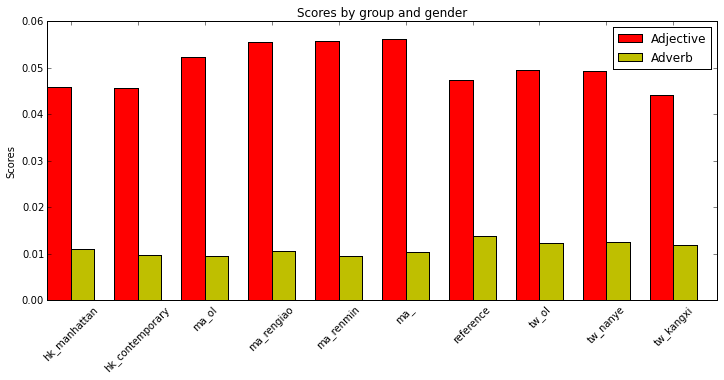

In [187]:
%matplotlib inline  
# a bar plot with errorbars
import numpy as np
import matplotlib.pyplot as plt

N = len(modern['region'])

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(12,5))
rects1 = ax.bar(ind, modern['adj_ratio'], width, color='r')

womenMeans = (25, 32, 34, 20, 25)
womenStd = (3, 5, 2, 3, 3)
rects2 = ax.bar(ind + width,  modern['fu_ratio'], width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width)
ax.set_xticklabels(('hk_manhattan', 'hk_contemporary', 'ma_ol', 'ma_rengiao', 'ma_renmin', 'ma_', 'reference', 'tw_ol','tw_nanye','tw_kangxi'), rotation=45)

ax.legend((rects1[0], rects2[0]), ('Adjective', 'Adverb'))


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

#autolabel(rects1)
#autolabel(rects2)

plt.show()

<h3>Adjective content by Events</h3>

In [238]:
path = '/Users/onyi/Dropbox/textbooks/Events'
Word={}
WordByBook= []
book_length = {}
adjcountbyEvent={}
adjratiobyEvent={}
EventLength = {}

In [239]:
events = ['invasion.txt', 'civilwar.txt', 'sinojapanwar.txt','xinhai.txt']

In [240]:

i=0
wordlist={}
for event in events:
    if not file.startswith('.'):
        for file in os.listdir(path):
            file_path = os.path.join(path, file)
            if os.path.isfile(file_path) and file.endswith(event):
                with open(file_path) as f: 
                    adjcountbyEvent[file] = 0
                    RawEvent = f.read()
                    RawEvent = re.sub("[。，；:!：“、〈〉\n\t■◆”《》~ ;﹜﹛()*.,a-zA-Z「」﹔（）〔〕？\d+]", "", RawEvent)
                    book_length[file] = len(RawEvent)
                    Word[file]= jieba.cut(RawEvent, cut_all=True)
                    for word in Word[file]:
                        if "not found in Dictionary." in dictionary(word):
                            pass
                        else:
                            temp = dictionary(word)
                            if (' 形 ' in temp or ' 成 ' in temp) and word not in stopwords:
                                adjcountbyEvent[file] = adjcountbyEvent[file]+1
            else:
                pass
 

In [241]:
adjcount_event = pd.DataFrame.from_dict(adjcountbyEvent, orient = 'index').reset_index()
booklength = pd.DataFrame.from_dict(book_length, orient = 'index').reset_index()
adjcount_event.columns = ['book','adj_count']
booklength.columns = ['book','book_length']
event = pd.merge(adjcount_event, booklength, on = 'book')
#event['region']= event['book'].str[:5]
event['adj_ratio'] = event['adj_count']/event['book_length']
event = event.sort('book')
#removing the old textbooks
event = event[~event['book'].str.startswith('ma_old')]
event = event[~event['book'].str.startswith('tw_old')]
event = event[~event['book'].str.startswith('sc_')]
event

,book,adj_count,book_length,adj_ratio
27,hk_文達_civilwar.txt,155,3460,0.044798
18,hk_文達_foreigninvasion.txt,568,12326,0.046081
33,hk_文達_sinojapanwar.txt,161,3949,0.040770
19,hk_文達_xinhai.txt,191,4448,0.042941
9,hk_現代_civilwar.txt,203,4112,0.049368
40,hk_現代_foreigninvasion.txt,747,16865,0.044293
4,hk_現代_sinojapanwar.txt,244,5991,0.040728
26,hk_現代_xinhai.txt,247,4937,0.050030
1,ma_人教_civilwar.txt,130,2822,0.046067
10,ma_人教_foreigninvasion.txt,113,2608,0.043328


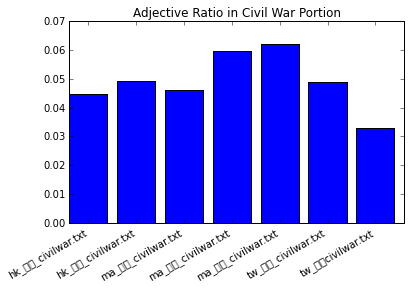

In [242]:
%matplotlib inline  

civilwar = event[event['book'].str.endswith('civilwar.txt')]
fig = plt.figure()
width = .4
ind = np.arange(len(civilwar['book']))
plt.bar(ind, civilwar['adj_ratio'],color = 'b')
plt.xticks(ind + width , civilwar['book'].values)
plt.title('Adjective Ratio in Civil War Portion')
fig.autofmt_xdate()

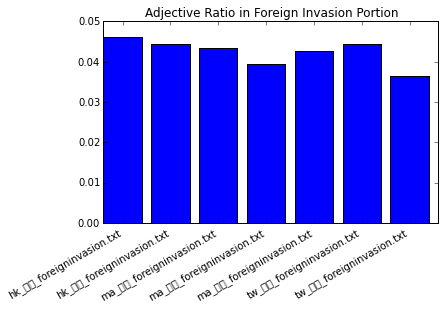

In [243]:
%matplotlib inline  

invasion = event[event['book'].str.endswith('invasion.txt')]
fig = plt.figure()
width = .4
ind = np.arange(len(invasion['book']))
plt.bar(ind, invasion['adj_ratio'],color = 'b')
plt.xticks(ind + width , invasion['book'].values)
plt.title('Adjective Ratio in Foreign Invasion Portion')
fig.autofmt_xdate()

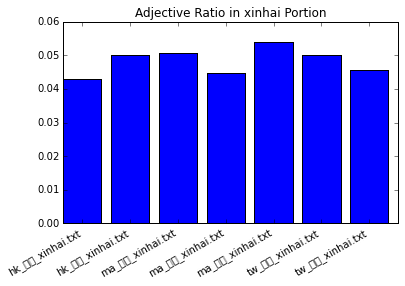

In [244]:
%matplotlib inline  

xinhai = event[event['book'].str.endswith('xinhai.txt')]
fig = plt.figure()
width = .4
ind = np.arange(len(xinhai['book']))
plt.bar(ind, xinhai['adj_ratio'],color = 'b')
plt.xticks(ind + width , xinhai['book'].values)
plt.title('Adjective Ratio in xinhai Portion')
fig.autofmt_xdate()

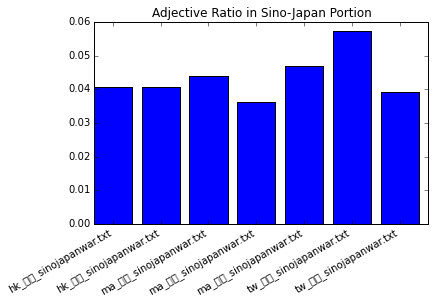

In [245]:
%matplotlib inline  
japan = event[event['book'].str.endswith('japanwar.txt')]
fig = plt.figure()
width = .4
ind = np.arange(len(japan['book']))
plt.bar(ind, japan['adj_ratio'],color = 'b')
plt.xticks(ind + width , japan['book'].values)
plt.title('Adjective Ratio in Sino-Japan Portion')
fig.autofmt_xdate()

<h3>Mention of Political Figures</h3>

In [188]:
#select all sentences that contains figures of party significance
path = '/Users/onyi/Dropbox/textbooks'
maocount={}
suncount={}
changcount={}
marxcount={}
commcount = {}
kmtcount ={}
verycount = {}
book ={}
for file in os.listdir(path):
    if not file.startswith('.'):
        file_path = os.path.join(path, file)
        if os.path.isfile(file_path) and file.endswith(".txt"):
            with open(file_path) as f: 
                book[file] = f.read()
                book[file] = re.sub("[。，；：“、\n\t■◆”《》~]", "", book[file])
                verycount[file] = book[file].count('十分')+book[file].count('非常') + book[file].count('很')+book[file].count( '颇')+book[file].count( '太')+book[file].count('极')+ book[file].count('过分')+book[file].count('相当') 
                maocount[file] = book[file].count('毛泽东')
                suncount[file]  = book[file].count('孙中山') + book[file].count('孫逸仙')
                changcount[file] = book[file].count('蒋介石') + book[file].count('蒋中正') + book[file].count('蒋总司令') + book[file].count('蒋委员长') +book[file].count('蒋主席')
                marxcount[file] = book[file].count('马克思') + book[file].count('馬克思')
                commcount[file] = book[file].count('共产党') + book[file].count('中共') + book[file].count('共党')
                kmtcount[file] = book[file].count('国民党') 

In [189]:
marx = pd.DataFrame.from_dict(marxcount, orient = 'index')
marx.columns = ['marx']
sun = pd.DataFrame.from_dict(suncount, orient = 'index')
sun.columns = ['sun']
chang = pd.DataFrame.from_dict(changcount, orient = 'index')
chang.columns = ['chang']
mao = pd.DataFrame.from_dict(maocount, orient = 'index')
mao.columns = ['mao']
comm = pd.DataFrame.from_dict(commcount, orient = 'index')
comm.columns = ['communist']
kmt = pd.DataFrame.from_dict(kmtcount, orient = 'index')
kmt.columns = ['kmt']
very = pd.DataFrame.from_dict(verycount, orient = 'index')
very.columns = ['very']

In [190]:
df_list = [mao, sun, chang, marx, comm, kmt, very]

for i, df in enumerate(df_list):
    if i == 0:
        figures = pd.merge(df_list[i], df_list[i+1], left_index = True, right_index = True)
    elif i < len(df_list)-1 :
        figures = pd.merge(figures, df_list[i+1], left_index = True, right_index = True)
    else:
        pass

In [213]:
figures['book']= figures.index.str[:5]

In [205]:
modern

,region,book_length,adj_count,fu_count,adj_ratio,fu_ratio
0,hk_文達,70201,3219,768,0.045854,0.010940
1,hk_現代,91087,4163,896,0.045704,0.009837
2,ma_ol,56925,2974,548,0.052244,0.009627
3,ma_人教,41545,2309,440,0.055578,0.010591
4,ma_人民,140418,7844,1324,0.055862,0.009429
5,ma_岳麓,38908,2186,405,0.056184,0.010409
6,searc,410198,19418,5627,0.047338,0.013718
7,tw_ol,46940,2329,577,0.049617,0.012292
8,tw_南一,30792,1519,383,0.049331,0.012438
9,tw_康熹,33640,1488,401,0.044233,0.011920


In [217]:
figures_count = figures.groupby(['book']).sum().reset_index()
figures_count = pd.merge(figures_count, modern, left_on = 'book', right_on = 'region')
figures_count['mao_ratio'] = figures_count['mao']/figures_count['book_length']
figures_count['sun_ratio'] = figures_count['sun']/figures_count['book_length']
figures_count['chang_ratio'] = figures_count['chang']/figures_count['book_length']
figures_count['marx_ratio'] = figures_count['marx']/figures_count['book_length']
figures_count['communist_ratio'] = figures_count['communist']/figures_count['book_length']
figures_count['kmt_ratio'] = figures_count['kmt']/figures_count['book_length']
figures_count['very_ratio'] = figures_count['very']/figures_count['book_length']
figures_count['ccp_kmt'] = (figures_count['communist'] + figures_count['marx'] + figures_count['mao'])/(figures_count['sun'] + figures_count['chang'] +figures_count['kmt']) 
#figures_count
figures_count= figures_count[figures_count['book'] != 'ma_ol']
figures_count= figures_count[figures_count['book'] != '_ol']

###Plot ratio of Pro-CCP Figures to Pro-KMT Figures


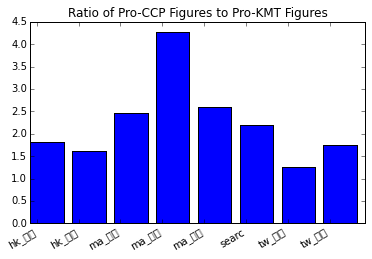

In [218]:
%matplotlib inline  

from matplotlib import pyplot as plt
fig = plt.figure()
width = .3
ind = np.arange(len(figures_count['ccp_kmt']))
plt.bar(ind, figures_count['ccp_kmt'],color = 'b')
plt.xticks(ind + width/2 , figures_count['book'].values)
plt.title('Ratio of Pro-CCP Figures to Pro-KMT Figures')
fig.autofmt_xdate()

<h3> Positive to Negative</h3>

In [114]:
import re, math, collections, itertools
import nltk, nltk.classify.util, nltk.metrics
from nltk.classify import NaiveBayesClassifier
from nltk.metrics import BigramAssocMeasures
from nltk.probability import FreqDist, ConditionalFreqDist

In [115]:
posFile = open('/Users/onyi/Dropbox/HistoryTextbook/sentiment/正面情感词语（中文）.txt',  encoding="gbk")
posWords = posFile.readlines()
posWords = list(map(lambda x:x.strip(),posWords))


In [116]:
posFile2 = open('/Users/onyi/Dropbox/HistoryTextbook/sentiment/正面评价词语（中文）.txt',  encoding="gbk")
posWords2 = posFile2.readlines()
posWords2 = list(map(lambda x:x.strip(),posWords2))
posWords.extend(posWords2)


In [117]:
negFile = open('/Users/onyi/Dropbox/HistoryTextbook/sentiment/负面情感词语（中文）.txt',  encoding="gbk")
negWords = negFile.readlines()
negWords = list(map(lambda x:x.strip(), negWords))

In [118]:
negFile2 = open('/Users/onyi/Dropbox/HistoryTextbook/sentiment/负面评价词语（中文）.txt',  encoding="gbk")
negWords2 = negFile2.readlines()
negWords2 = list(map(lambda x:x.strip(),negWords2))
negWords.extend(negWords2)


In [119]:
#number of words that are in each episode
path = '/Users/onyi/Dropbox/textbooks/Events/Post1949'
book={}
phrases = {}
bookindex = {}
NumPosWords = {}
NumNegWords = {}
length1949 = {}
for file in os.listdir(path):
    if not file.startswith('.'):
        file_path = os.path.join(path, file)
        if os.path.isfile(file_path) and file.endswith(".txt"):
            with open(file_path) as f: 
                book[file] = f.read()
                #print(file)
                book[file] = re.sub("[。，；:!：“、〈〉\n\t■◆”《》~ ;()*.,a-zA-Z「」〔〕]", "", book[file])
                length1949[file] = len(book[file])
                #book_file_name.append(file)
                phrases[file]= jieba.cut(book[file], cut_all=False) #segmenting the content  
                #count number of positive phrases
                NumPosWords[file] = 0
                NumNegWords[file] = 0
                for phrase in phrases[file]:
                    if phrase in posWords:
                        NumPosWords[file] = NumPosWords[file] + 1
                    if phrase in negWords:
                        NumNegWords[file] = NumNegWords[file] + 1
                    #  posWords.count(phrase)
                    #NumNegWords[file] =+ negWords.count(phrase)
                


In [120]:
print(len(posWords), len(negWords))

4570 4374


In [121]:
#calculate the ratio of positive and negative words
NumPosWords_df = pd.DataFrame.from_dict(NumPosWords, orient = 'index')
NumNegWords_df = pd.DataFrame.from_dict(NumNegWords, orient = 'index')
posneg = pd.merge(NumPosWords_df, NumNegWords_df, left_index = True, right_index = True)
posneg.columns = ['pos','neg']
posneg['posneg_ratio'] = posneg['pos']/posneg['neg']
posneg['post1949'] = 0
posneg = posneg.reset_index()
posneg.ix[posneg['index'].str.endswith('post1949.txt'), 'post1949'] = 1
posneg['book'] = posneg['index'].str[:5]
posneg = posneg.pivot(index='book', columns='post1949', values='posneg_ratio').reset_index() #convert dataframe from long to wide
#posneg.columns
posneg.columns = ['book', 'pre1949', 'post1949' ]
posneg['region'] = posneg['book'].str[:2]

#removing the old textbooks
posneg = posneg[posneg['book'] != 'ma_ol']
posneg = posneg[posneg['book'] != 'ma_老版']
posneg = posneg[posneg['book'] != 'tw_台湾']

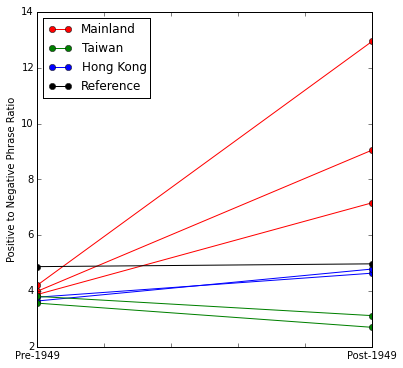

In [141]:
colors = {'ma':'red', 'tw':'green', 'hk':'blue', 'se':'black'}
x = [0,1]
y_mat = posneg[[ 'pre1949', 'post1949']].values
color = posneg['region'].apply(lambda x: colors[x])

fig, ax = plt.subplots(figsize=(6,6))
for y, color in zip(y_mat, color):
    ax.plot(x, y,'-o' , c=color  )
handles, labels = ax.get_legend_handles_labels()
#Create custom artists

ma = plt.Line2D((0,1),(0,0), color='r', marker='o', linestyle='-')
tw = plt.Line2D((0,1),(0,0), color='g', marker='o', linestyle='-')
hk = plt.Line2D((0,1),(0,0), color='blue', marker='o', linestyle='-')
ref = plt.Line2D((0,1),(0,0), color='black', marker='o', linestyle='-')


#Create legend from custom artist/label lists
ax.legend([handle for i,handle in enumerate(handles) if i in display]+[ma, tw,hk, ref],
          [label for i,label in enumerate(labels) if i in display]+['Mainland', 'Taiwan', 'Hong Kong','Reference'],
           loc = 'best')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Pre-1949'
labels[5] = 'Post-1949'

ax.set_xticklabels(labels)
ax.set_ylabel("Positive to Negative Phrase Ratio" )
plt.show()

### Word Length in Pre1949 to Post1949

In [142]:
length_post49 = { key:value for key, value in length1949.items() if 'post' in key }
length_pre49 = { key:value for key, value in length1949.items() if 'pre' in key }

In [143]:
length_post49_df = pd.DataFrame.from_dict(length_post49, orient = 'index')
length_post49_df.columns = ['post49_length']
length_pre49_df = pd.DataFrame.from_dict(length_pre49, orient = 'index')
length_pre49_df.columns = ['pre49_length']

In [144]:
length_post49_df['book']= length_post49_df.index.str[:5]
length_pre49_df['book']= length_pre49_df.index.str[:5]

In [147]:
prepost49 = pd.merge(length_post49_df, length_pre49_df, on = 'book')
prepost49['post_pre_ratio'] = prepost49['post49_length']/prepost49['pre49_length']
prepost49 = prepost49[prepost49['book'] != 'ma_ol']
prepost49 = prepost49.sort(['book'])

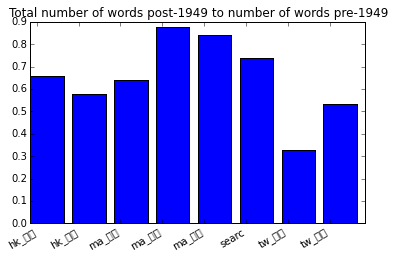

In [175]:
from matplotlib import pyplot as plt
fig = plt.figure()
width = .3
ind = np.arange(len(prepost49['book']))
plt.bar(ind, prepost49['post_pre_ratio'],color = 'b')
plt.xticks(ind + width/2 , prepost49['book'].values)
plt.title('Total number of words post-1949 to number of words pre-1949')
fig.autofmt_xdate()

###Time Series Analysis